In [8]:
# import library 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

# set graph grid
sns.set_style("whitegrid")

## Selection of data

In [16]:
# import data
df=pd.read_csv('D:\\cads and analysis\\Downloads\\India_Diabetes.csv')


In [17]:
# col name created
datacol = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

# assign column name
df.columns= datacol

In [18]:
# Column names check
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Column explanation :

1. Pregnancies : No. of times pregnant
2. Gloucose : Plasma gloucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood Pressure(mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
5. Insulin : 2 hours serum insulin (muU/ml)
6. BMI : Body mass index(weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Age(years)
9. Outcome : Class variable(0 or 1)



In [19]:
# Observe few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [20]:
# data size
df.shape

(767, 9)

**So data has 768 rows and 9 column**

In [21]:
#data information on column type , null and unique count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
# Checking Null
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Na values are Zero**

In [23]:
# Min check of data

df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

**For variable Glucose ,BloodPresure ,Skin Thickness , Insulin, and BMI what we observe min is zero which is not possible** 

# Missing Data Impute


In [25]:
# Precence of Zero in percentage 

df[df==0.0].count(0)/len(df)*100

Pregnancies                 14.471969
Glucose                      0.651890
BloodPressure                4.563233
SkinThickness               29.595828
Insulin                     48.631030
BMI                          1.434159
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.189048
dtype: float64

* For Glucose , BloodPressure  BMI  
    * To impute the data will be using statistics location point median
* For SkinThickness & Insulin 
    * Since we have high number of data missing 
    * will check the correlation to check for multicollinearity  
    * then build model to impute the data

In [27]:
# Missing Data impute 
df.Glucose.replace(0,df.Glucose.median(),inplace=True)
df.BloodPressure.replace(0,df.BloodPressure.median(),inplace=True)
df.BMI.replace(0,df.BMI.median(),inplace=True)

<AxesSubplot:>

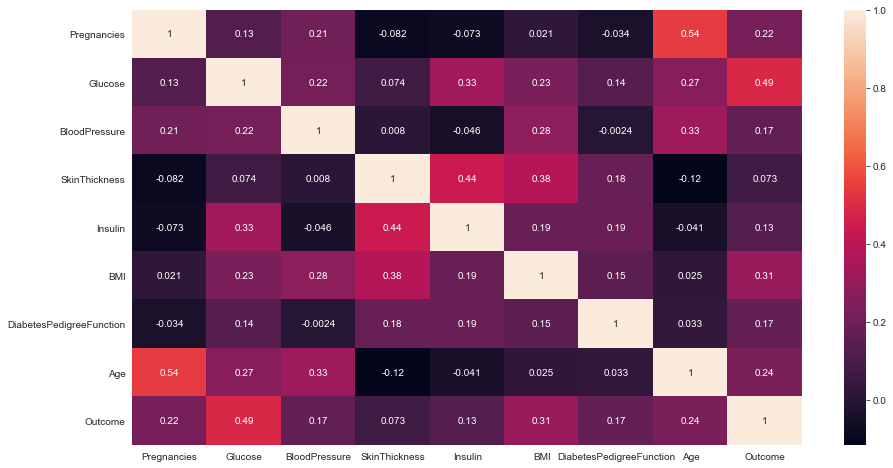

In [28]:
# Coorelation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

1. Column Insulin & DiabetesPedigressFunction , we donot see any corr > 0.7
2. Will use linear regression model to predict the missing data 
3. Will drop Insulin & DiabetesPedigressFunction for EDA

In [29]:
# drop the column
df.drop(['Insulin','SkinThickness'],axis=1,inplace=True)

In [31]:
# Description of data
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,72.387223,32.449413,0.471674,33.219035,0.348110
std,3.370877,30.443252,12.104527,6.879727,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


# Understanding Variables in Data

Based on descriptive our understand of variable :

1. Pregnancies 
 * Missing value - No Value
 * Data type - Discrete 
 * Mean and Median value is fairly close which imply the distribution are not much skewed
 * The mean is greater than the median ,so data is right skewed / positive skewed. 
 * Interquartile range for number of pregnencies in 5 (6 - 1) ie (Q3 - Q1)


2. Glucose 
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 121.65 & Median is 117.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for Glucose in  (140.25 - 99.75) ie (Q3 - Q1)


3. BloodPressure
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 72.38 & Median is 72.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for BloodPressure in  (140.25 - 99.75) ie (Q3 - Q1)

4. BMI
 *  Missing value - Replace with Median
 *  Data type - Continuous
 *  Mean is 32.45 & Median is 32.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for BMI in  (36.00 - 27.00) ie (Q3 - Q1)
 
 
5. DiabetesPedigreeFunction   
 *  Missing value - No Value
 *  Data type - Continuous 
 *  Mean is 0.47 & Median is 0.37,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for DiabetesPedigreeFunction in  (0.62 - 0.24) ie (Q3 - Q1)
 
6. Age    
 *  Missing value - No Value
 *  Data type - Discrete 
 *  Mean is 33.24 & Median is 29.00,as Mean > Median , so it indicate it is right skew / positive skewed.
 *  Interquartile range for Age in  (41.00 - 24.00) ie (Q3 - Q1)
 
7.  Outcome
 *  Missing Value -  No Value
 *  Data Type - Nominal & Boolean
 *  five point summary is not valid for Nominal data type

# Univariate Analysis of Variable

## Discrete Variable Analysis 
### Pregnancies

Text(0, 0.5, 'Total count')

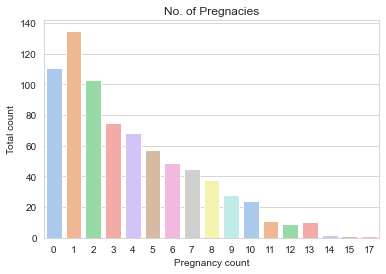

In [32]:
sns.countplot(x=df.Pregnancies,
             palette="pastel").set_title('No. of Pregnacies')
plt.xlabel("Pregnancy count")
plt.ylabel("Total count")

### Age

Text(0.5, 1.0, 'Histograph of Age')

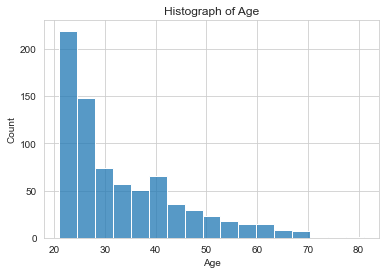

In [33]:
# Histoplot for Age
sns.histplot(x=df.Age).set_title("Histograph of Age")

### Outcome

In [34]:
# Outcome count
df.Outcome.value_counts()

0    500
1    267
Name: Outcome, dtype: int64

In [36]:
# Outcome count
df.Outcome.value_counts()/len(df)

0    0.65189
1    0.34811
Name: Outcome, dtype: float64

**Out of 788 data points 65% do not have diabetes**

Text(0.5, 1.0, 'BarPlot on Outcome')

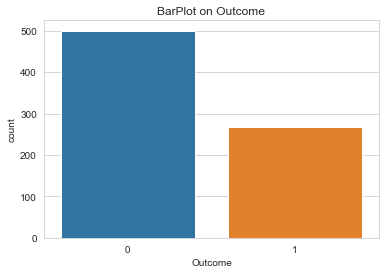

In [37]:
sns.countplot(x=df.Outcome).set_title("BarPlot on Outcome")

### Continous Variable Analysis

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

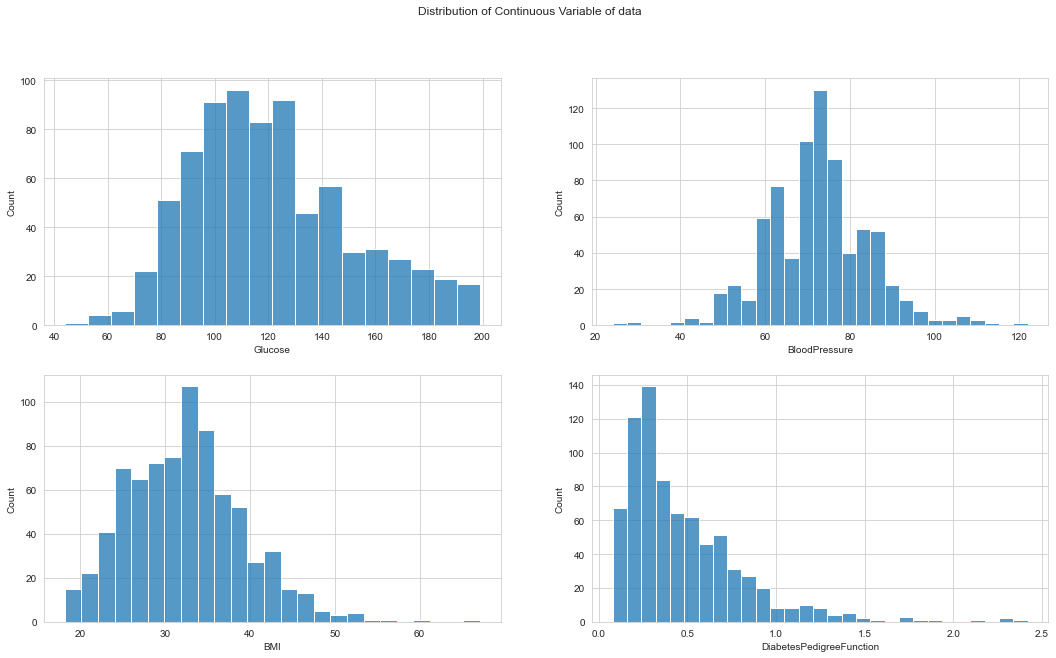

In [38]:
fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('Distribution of Continuous Variable of data')
  
sns.histplot(ax=axes[0, 0], x=df.Glucose)
sns.histplot(ax=axes[0, 1], x=df.BloodPressure)
sns.histplot(ax=axes[1, 0], x=df.BMI)
sns.histplot(ax=axes[1, 1], x=df.DiabetesPedigreeFunction)


In [39]:
df.loc[:,df.columns != 'Outcome'].skew(axis = 0, skipna = True)

Pregnancies                 0.903976
Glucose                     0.538571
BloodPressure               0.141668
BMI                         0.601351
DiabetesPedigreeFunction    1.921190
Age                         1.135165
dtype: float64

**Skewness of Variables are greater than Zero which indicate they are right /positive skewed. As we observerd looking at histograph and on five point summary**

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

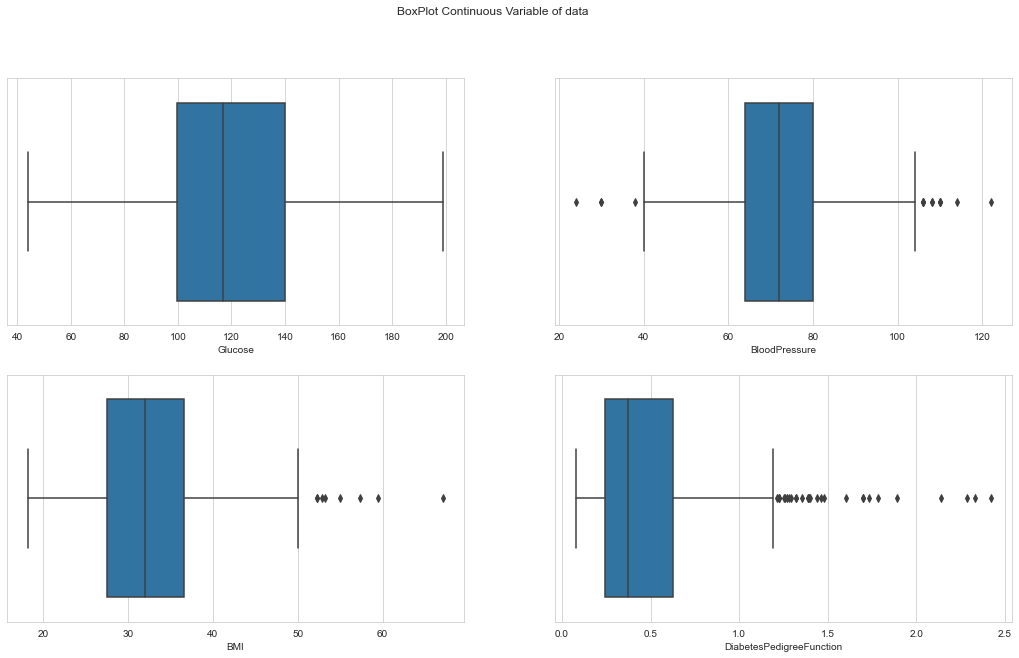

In [40]:
# Box plot 

fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('BoxPlot Continuous Variable of data')
  
sns.boxplot(ax=axes[0, 0], x=df.Glucose)
sns.boxplot(ax=axes[0, 1], x=df.BloodPressure)
sns.boxplot(ax=axes[1, 0], x=df.BMI)
sns.boxplot(ax=axes[1, 1], x=df.DiabetesPedigreeFunction)


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
  <b>Observation : </b>
    
* Other than Glucose we observe outliers in other variable (Blood Presssure,BMI, Diabetes Pedigree Function)

# Bivariate Analysis

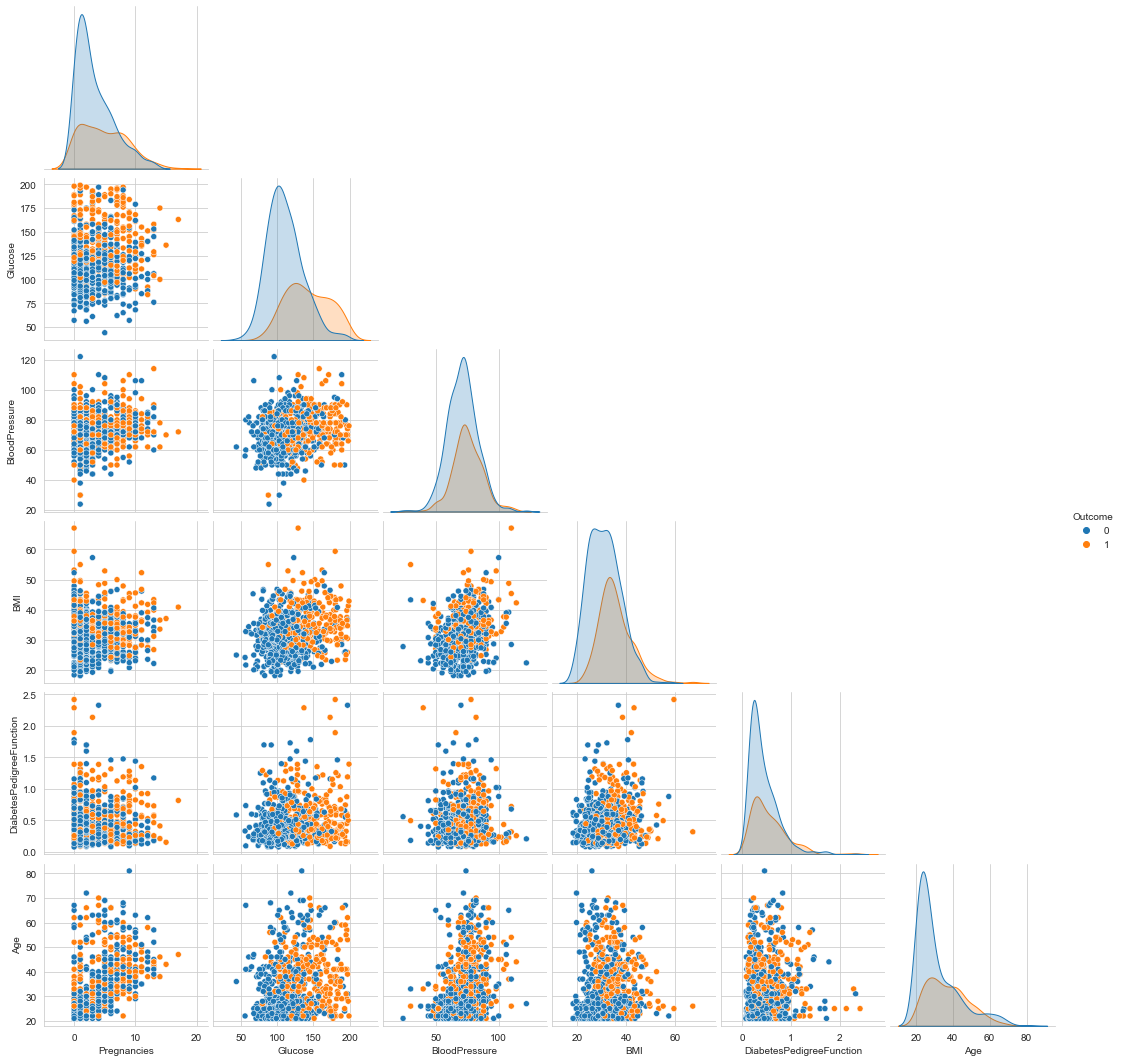

In [41]:
sns.pairplot(df,hue="Outcome",corner=True)

## Correlation Plot

<AxesSubplot:>

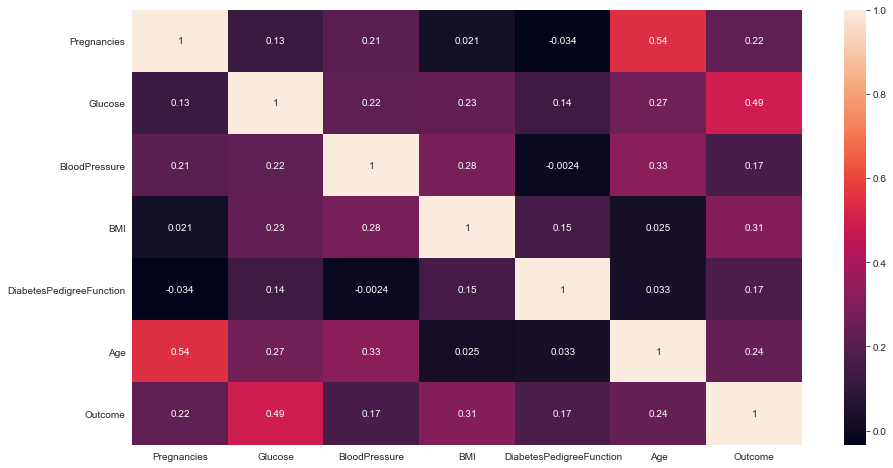

In [42]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot=True)

### Pregnancy - Outcome

Pregnancies                               
               mean median min max      skew count
Outcome                                           
0          3.298000      2   0  13  1.114105   500
1          4.861423      4   0  17  0.506401   267

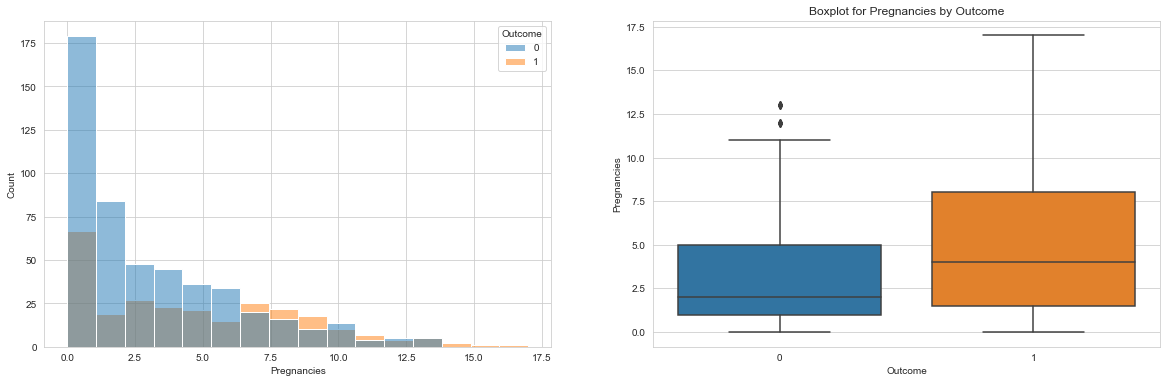

In [44]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Pregnancies",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Pregnancies).set_title("Boxplot for Pregnancies by Outcome")


df[["Outcome","Pregnancies"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
<b>Observation : <b> 
* Women are likely to be diabetic with  higher pregnancies count
* There are few outliner in non diabetic cases 



### Glucose - Outcome

Glucose                                
               mean median min  max      skew count
Outcome                                            
0        110.682000  107.5  44  197  0.651964   500
1        142.108614  140.0  78  199  0.106846   267

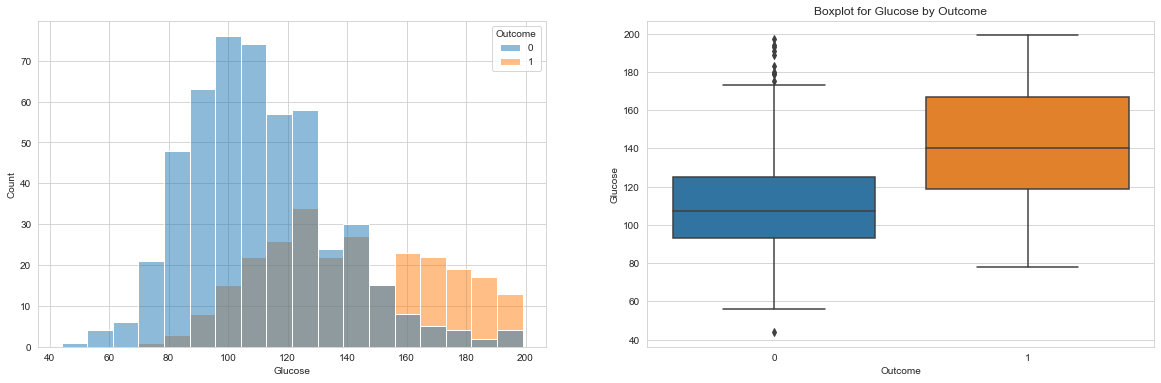

In [46]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Glucose",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Glucose).set_title("Boxplot for Glucose by Outcome")


df[["Outcome","Glucose"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">

 <b>Observation:<b>
* Glucose level are high for diabetic women

### Blood Pressure  - Outcome

BloodPressure                                
                 mean median min  max      skew count
Outcome                                              
0           70.920000     72  24  122  0.153613   500
1           75.134831     74  30  114  0.125081   267

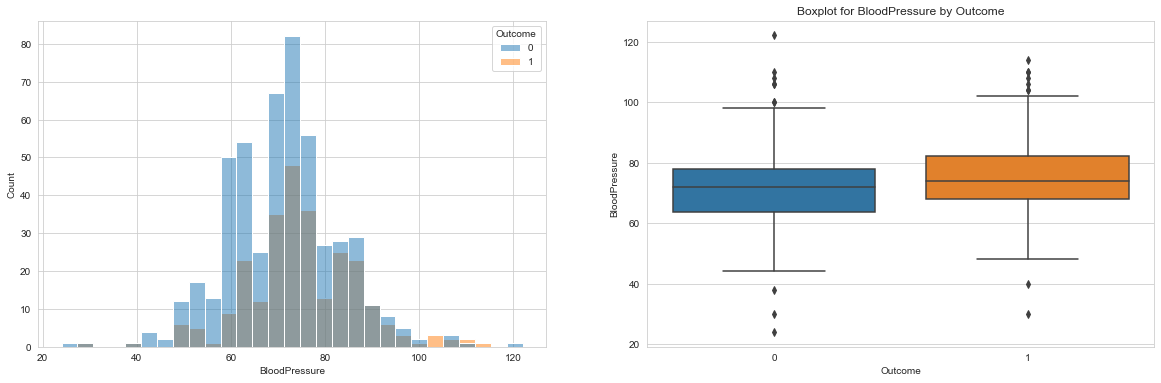

In [48]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BloodPressure",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.BloodPressure).set_title("Boxplot for BloodPressure by Outcome")


df[["Outcome","BloodPressure"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))


<div style="background-color:#a89e32;
            border-radius:10px;
            letter-spacing:0.5px;
            display:fill;
            font-size:110%;
            margin: 5px;">
<p style="padding:5px;">
    
<b>Observation: </b>
* There is less difference of BP level for diabetic & non-diabetic cases. 
</p>
</div>    

### BMI - Outcome

BMI                                   
              mean median   min   max      skew count
Outcome                                              
0        30.880200   30.4  18.2  57.3  0.464242   500
1        35.388015   34.3  22.9  67.1  1.027067   267

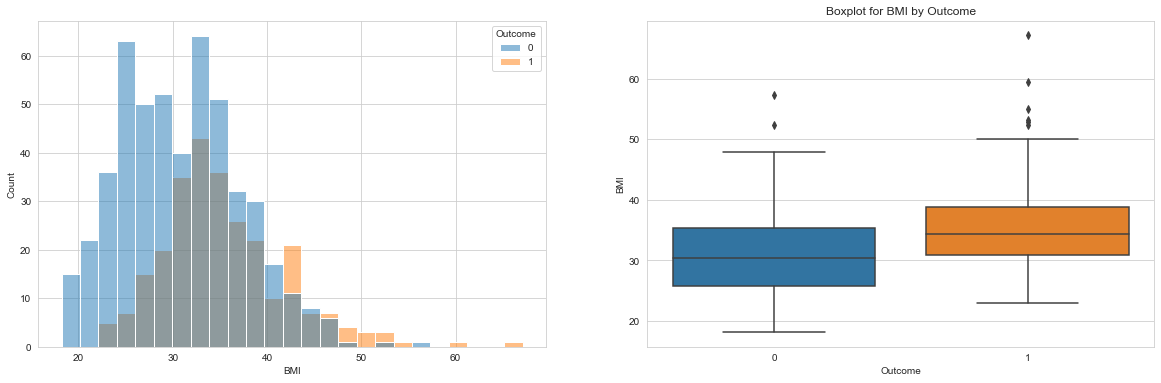

In [49]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="BMI",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.BMI).set_title("Boxplot for BMI by Outcome")


df[["Outcome","BMI"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Observation : 
* Women with diabetic seems to have high BMI
* Few outlier cases observed in both

### DiabetesPedigreeFunction - Outcome

DiabetesPedigreeFunction                                     
                            mean median    min    max      skew count
Outcome                                                              
0                       0.429734  0.336  0.078  2.329  2.006242   500
1                       0.550213  0.447  0.088  2.420  1.721891   267

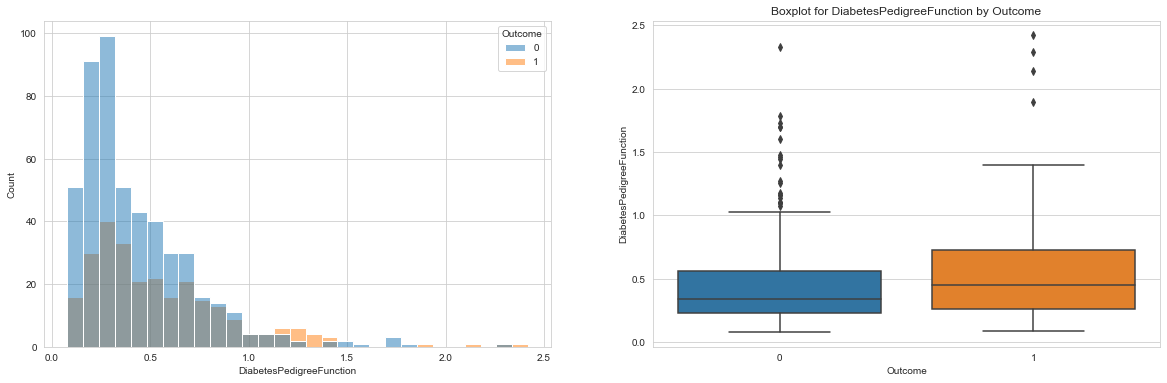

In [50]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="DiabetesPedigreeFunction",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.DiabetesPedigreeFunction).set_title("Boxplot for DiabetesPedigreeFunction by Outcome")


df[["Outcome","DiabetesPedigreeFunction"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))



Observation : 
* There are slight difference location value, Diabetes Pedigree Function might effect diabetic 
* Outliners can be seem in both cases (Diabetic and NonDiabetic)

### Age - Outcome

Age                               
              mean median min max      skew count
Outcome                                          
0        31.190000     27  21  81  1.571609   500
1        37.018727     36  21  70  0.592289   267

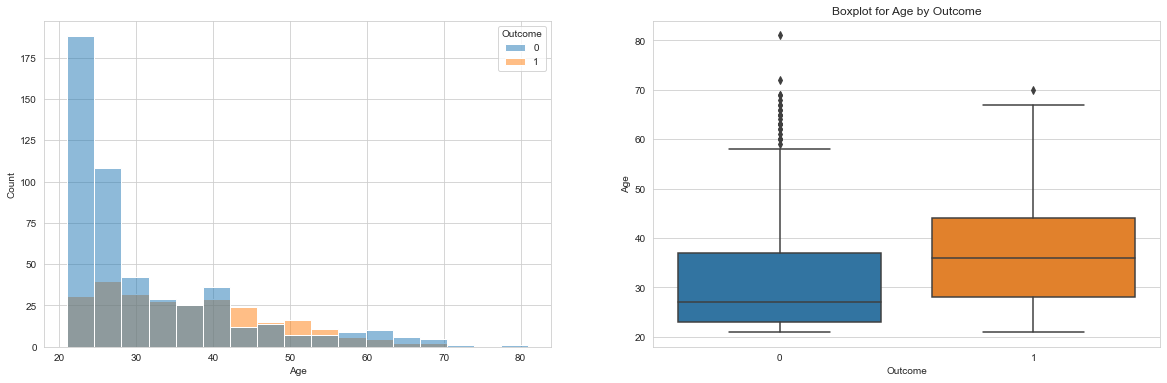

In [51]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data = df, hue="Outcome")

plt.subplot(1,2,2)
sns.boxplot(x=df.Outcome, y=df.Age).set_title("Boxplot for Age by Outcome")


df[["Outcome","Age"]].groupby(by="Outcome").agg(("mean","median","min","max","skew","count"))

Observation:
* Diabetic case are more in higher age group with high mean value